# Inhaltsverzeichnis 

- **`Seaborn` Aufgaben**
    - **Aufgabe 1 - Vorbereitung**
        - **Samplesatz**
    - **Aufgabe 2 - Kategorische Daten**
        - **Countplot des Features `cut`**
        - **Countplot des Features `clarity`**
        - **Boxplot von `carat`**
    - **Aufgabe 3 - Verteilungsdiagramme**
        - **KDE von `carat`**
    - **Aufgabe 4 - Statische Zusammenhänge**
        - **KDE von `price` und `carat`**
        - **Scatterplot von `price` und `carat`**
    - **Aufgabe 5 - Regression**


# `Seaborn` Aufgaben

## Aufgabe 1 - Vorbereitung

- Importiere das Modul `seaborn` 
- Lies den `seaborn` Datasatz `diamonds` mit der Funktion [`load_dataset("diamonds")`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html) ein und speichere ihn in einer Variable.
- Lass dir die Größe des Data Frames auf der Konsole ausgeben.
- Wieviele Samples existieren? Wieviele Features gibt es?
- Lass dir die ersten 10 Zeilen auf der Konsole ausgeben.
- Lass dir die Datentypen der Spalten auf der Konsole ausgeben.
- Die Funktion `load_dataset` liefert ein `pandas Dataframe` zurück. Lass dir das bestätigen, indem du den Typ der angelegten Variable abfragst.

In [2]:
import pandas as pd                            
import seaborn as sns                        
sns.set_theme() 

diamonds = sns.load_dataset("diamonds") 

In [8]:
# 53.940 Samples und 10 Features
diamonds.shape

(53940, 10)

In [9]:
diamonds.axes

[RangeIndex(start=0, stop=53940, step=1),
 Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
        'z'],
       dtype='object')]

In [10]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [11]:
# Datentypen
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [12]:
# Pandas Dataframe
print(type(diamonds))

<class 'pandas.core.frame.DataFrame'>


### Samplesatz

Wie wir oben sehen können, ist der Datensatz sehr groß. Perfekte Vorraussetzungen um statistische Methoden, wie Regression und/oder Machine Learning anzuwenden. Mehr Datenpunkte bedeutet, dass wir ein passenderes Modell der Daten erstellen können. Allerdings ist das nicht immer vorteilhaft, besonders bei Visualisierungen. Bei manchen Plots kann man leider bei einer großen Datenmenge nichts erkennen, wie man unten beim [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) sehen kann. Dieser Plot soll die Verteilung der Preise für die unterschiedlichen Kategorien anzeigen, durch die Menge der Samples können wir jedoch nichts von Bedeutung erkennen.

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


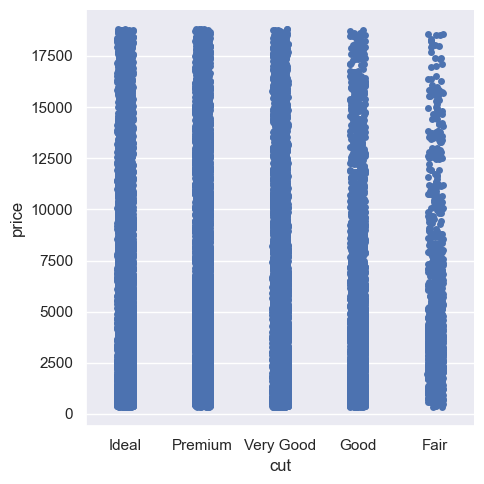

In [13]:
sns.catplot(data=diamonds, x='cut', y='price')

Wir wollen daher von nun an nur mit einigen Samples unserer Daten arbeiten.  

- Benutze die Methode <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html'>`sample`</a> eines `pandas Dataframe`, um eine Stichprobe von 500 Datenpunkte zu sammeln. Speichere diese Samples in einem (neuen) Dataframe.
- Lass dir die Dimensionen des Data Frames auf der Konsole ausgeben.
- Lass dir die ersten 10 Datenpunkte auf der Konsole ausgeben.
- Lass dir die Datentypen der Spalten auf der Konsole ausgeben.
- Lass dir den `catplot` (siehe oben) der 500 Samples plotten.

In [24]:
# 500 Datenpunkte in neuer Variable
diamonds_neu = diamonds.sample(500)

In [25]:
# Dimensionen von diamonds_neu
diamonds_neu.shape

(500, 10)

In [26]:
# die ersten 10 Zeilen
diamonds_neu.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
3873,0.81,Ideal,F,SI1,62.3,55.0,3481,5.96,6.00,3.72
37971,0.41,Ideal,E,VS1,61.5,56.0,1007,4.77,4.79,2.94
12486,1.05,Very Good,D,SI1,61.6,61.0,5255,6.50,6.55,4.02
1936,0.75,Good,E,VS2,62.6,58.0,3084,5.73,5.78,3.60
20520,1.25,Very Good,E,VS2,61.6,57.0,8851,6.90,6.94,4.26
41729,0.41,Ideal,E,VVS2,61.4,56.0,1243,4.81,4.77,2.94
19465,1.50,Good,D,SI2,63.4,59.0,8108,7.20,7.25,4.58
6241,0.90,Ideal,D,SI2,62.4,56.0,4007,6.24,6.16,3.87
9793,1.01,Ideal,E,SI2,61.1,57.0,4666,6.48,6.52,3.97
16343,1.10,Ideal,G,VS1,61.3,54.0,6535,6.69,6.65,4.09


In [27]:
# Datentypen
diamonds_neu.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


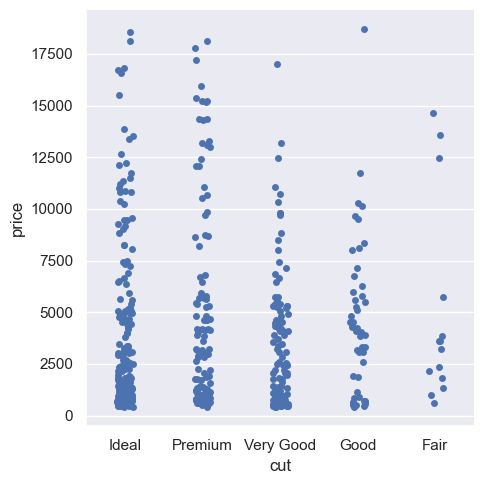

In [28]:
sns.catplot(data = diamonds_neu, x = 'cut', y = 'price')

## Aufgabe 2 - Kategorische Daten

Wir wollen nun mehr über unsere Daten erfahren. Unsere wichtigen Features sind vom Typ `category`, wie z.B. `cut` oder `clarity`. Das bedeutet die enthaltenen Werte sind kategorischer Natur und _nicht_ numerisch. 


> <span style="color:blue"> **_INFO:_** </span> In den folgenden Aufgaben kannst du _immer_ die Funktion [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) verwenden. Mit dieser Funktion erhält man die Möglichkeit unterschiedliche Plots zu erstellen. Die Art des Plots wird dann über den Parameter `kind` angegeben. Will man z.b. einen `countplot` erstellen, muss man `kind = "count"` angeben.

### Countplot des Features `cut`

Erstelle ein [Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) des Features `cut`. Hier werden die einzelnen Werte für dieses Feature gezählt (_engl: count_) und dargestellt.

- Wie viele Gruppen gibt es? 
- Welche ist die häufigste? 

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


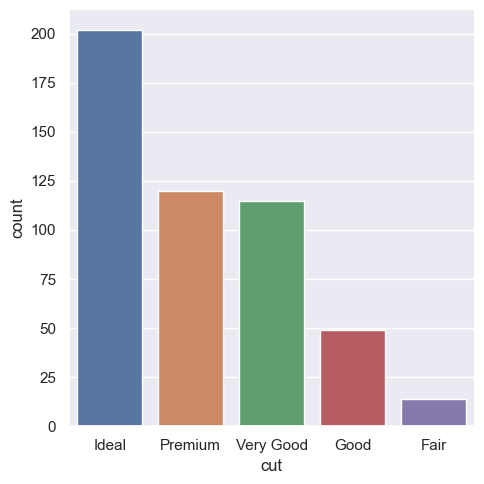

In [34]:
# Es gibt 5 Gruppen und die häufigste ist die Gruppe "Ideal"

sns.catplot(data = diamonds_neu, x = "cut", kind = "count")

### Countplot des Features `clarity`

Erstelle nun ein Countplot des Features `clarity`. 

- Wie viele Gruppen gibt es?
- Welche ist die häufigste? 

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


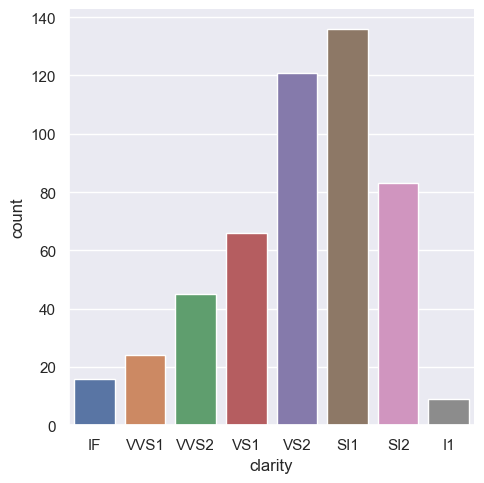

In [35]:
# Es gibt 8 Gruppen und die häufigste ist die Gruppe "SI1"

sns.catplot(data = diamonds_neu, x = "clarity", kind = "count")

### Boxplot von `carat`

Erstelle ein [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) von `carat` für jeden Wert in `cut`. Mit einem Boxplot erhalten wir einen Überblick über die Verteilung der Werte eines Features. Wir wollen in dieser Aufgabe die Verteilung des Features `carat` für jede Kategorie aus `cut` darstellen lassen. Als Ergebnis sollten daher 5 Boxplots erscheinen, einer für jede Kategorie aus `cut` (Ideal, Premium, Very Good, Good, Fair).

Beantworte anhand der Plots folgende Fragen:

- Welche Gruppe hat den größten Ausreißer? 
- Welche Gruppe hat den größten Median? 
- Welche Gruppe hat die größte Varianz?


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


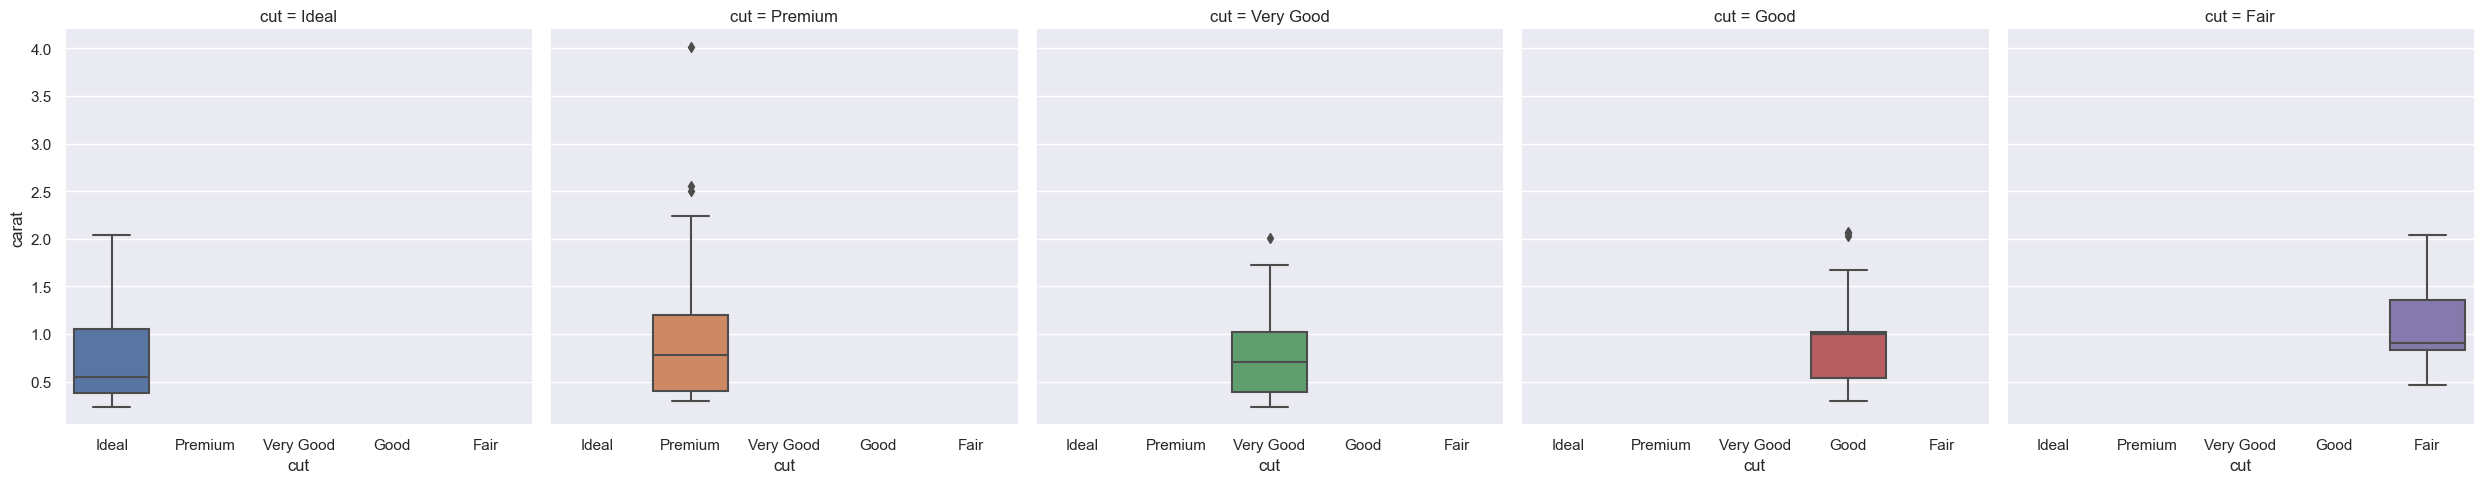

In [43]:
# die größten Ausreißer: cut Premium
# der größte Median:     cut Premium
# die größte Varianz:    cut Premium

sns.catplot(data = diamonds_neu, x = "cut", y = "carat", kind = "box", col = "cut")

## Aufgabe 3 - Verteilungsdiagramme

### KDE von `carat`

Erstelle ein [KDE Plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) des Features `carat` mit einer Farblegende für `cut` (d.h. `hue=cut`). Teste die verschiedenen Werte 
- layer
- stack
- fill

für den Parameter `multiple`. Als Resultat erhälst du die Verteilung der Werte in `carat`, getrennt nach den einzelnen Gruppen aus `cut`.

- Wieviel Karat haben die meisten Diamanten?

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


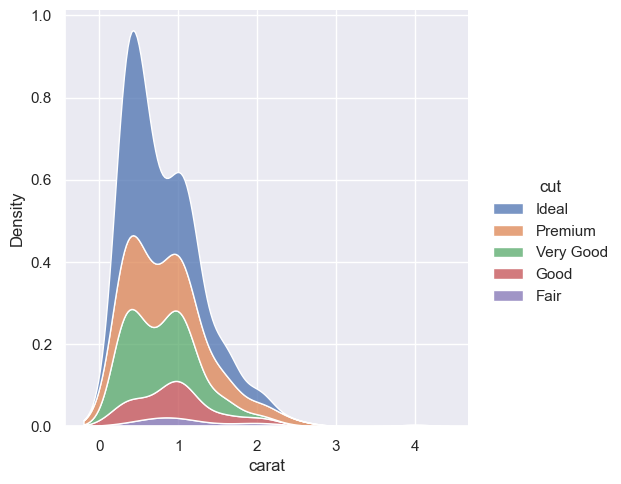

In [47]:
# die meisten Diamanten haben ca. 0.5 Karat

sns.displot(data = diamonds_neu, x = "carat", hue = 'cut',     
            multiple = "stack", fill = True,  kind = "kde")

## Aufgabe 4 - Statische Zusammenhänge


### KDE von `price` und `carat`

Erstelle ein KDE Plot mit `x='price'` und `y='carat'`. Dadurch bekommen wir die Verteilung der Features `price` und `carat` in einem Schaubild. Die Häufigkeit wird über die Farbe codiert (setze hierfür die Parameter `fill` und `cbar` auf `True`). 

- Was sagt uns dieser Graph über die Variablen?

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


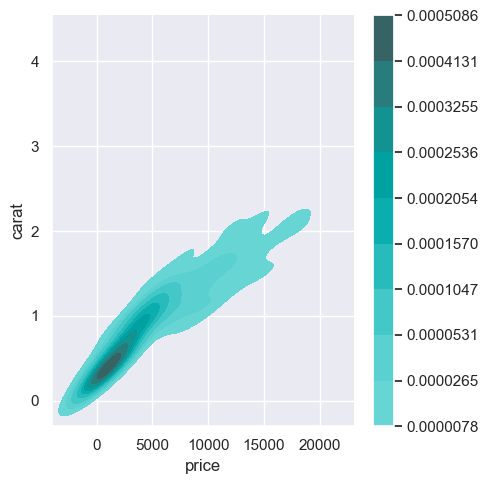

In [50]:
# die größte Häufigkeit ca. 0.4 Karat und und Preis bei 500 - 1000 

sns.displot(data = diamonds_neu, x = "price", y = "carat",     
            cbar = True, fill = True,  kind = "kde", color = "cyan")

### Scatterplot von `price` und `carat`
Die KDE ist eine Schätzungsfunktion basierend auf den Daten. Auf der anderen Seite visualisiert ein [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) die tatsächlichen Datenpunkte und extrapoliert _nicht_. Erstelle ein Scatterplot mit `x='price'` und `y='carat'` für die unterschiedlichen Kategorien in `cut` (`hue = "cut"`).

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


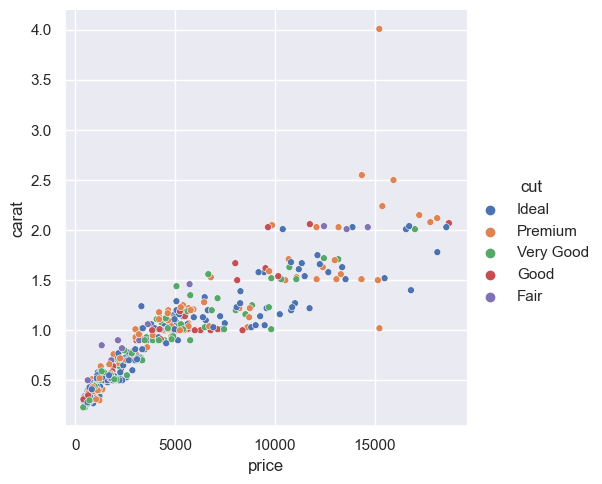

In [65]:
sns.relplot(data = diamonds_neu, x = "price", y = "carat",     
               hue = "cut", kind = "scatter", s = 25)

## Aufgabe 5 - Regression

Erstelle eine [Regressionskurve](https://seaborn.pydata.org/generated/seaborn.regplot.html) für den Scatterplot von oben. (Über den Parameter `scatter` kannst du bestimmen, ob neben der Regressionsgeraden zusätzlich die Datenpunkt angezeigt werden sollen.)

- Ausgehend von dieser Geraden: Was ist die Verbindung zwischen `carat` und `price`? Sind die Features korreliert?

<Axes: xlabel='price', ylabel='carat'>

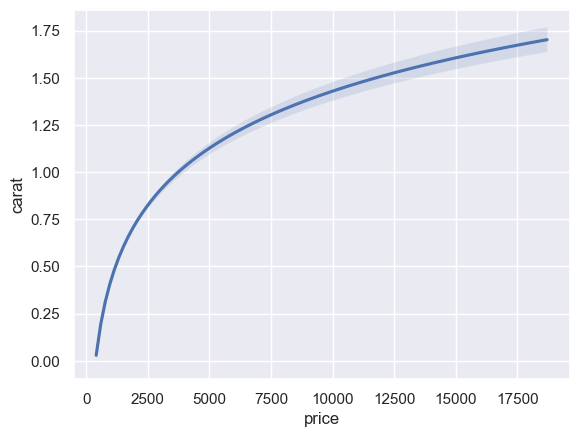

In [72]:
# Der Graph ist eine Kurve, die Korrelation ist von 500 bis 6000 besonders hoch

sns.regplot(data = diamonds_neu, x = "price", y = "carat", scatter = False, logx = True)

In [69]:
diamonds_neu.corr(numeric_only = True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.003364,0.233784,0.915106,0.972082,0.971516,0.973477
depth,0.003364,1.000000,-0.283956,-0.015264,-0.063692,-0.062164,0.053736
table,0.233784,-0.283956,1.000000,0.163158,0.235033,0.226405,0.199332
price,0.915106,-0.015264,0.163158,1.000000,0.889110,0.890897,0.888896
x,0.972082,-0.063692,0.235033,0.889110,1.000000,0.998887,0.992574
y,0.971516,-0.062164,0.226405,0.890897,0.998887,1.000000,0.992776
z,0.973477,0.053736,0.199332,0.888896,0.992574,0.992776,1.000000
